In [1]:
import numpy as np
import matplotlib.pyplot as plt

import mylibrary.nnlib as tnn

In [6]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
from ipywidgets import interactive

In [3]:
num_points = 50
X1 = np.linspace(-2.5, 1.5, num_points)
X2 = np.linspace(-2, 4, num_points)
X1, X2 = np.meshgrid(X1, X2)
Y = np.sin(np.sqrt(X1**2 + X2**2))*2-1.

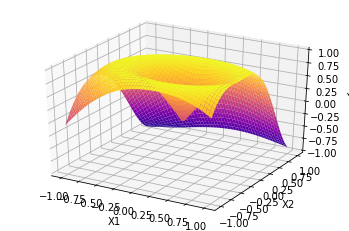

In [4]:
####Scaling the data to range -1,1
X1 = 2*(X1 - X1.min())/(X1.max() - X1.min()) -1
X2 = 2*(X2 - X2.min())/(X2.max() - X2.min()) -1
Y = 2*(Y - Y.min())/(Y.max() - Y.min()) -1

x1 = X1.reshape(-1)
x2 = X2.reshape(-1)

%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
# ax.scatter(X1, X2, Y)
ax.plot_surface(X1, X2, Y, cmap='plasma')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [5]:
xx = np.c_[x1, x2]
yy = Y.reshape(-1,1)

### 2 Sigmoid

In [10]:
%matplotlib inline

linear = tnn.LinearLayer(2, 1)
sigmoid = tnn.Sigmoid()

def network(w0, w1, b):
    
    linear.weights[0][0] = w0
    linear.weights[1][0] = w1
    linear.bias[0] = b
    
    a1 = linear.forward(xx)
    yy = sigmoid.forward(a1)
    
    plt.scatter(x1, x2, c=yy>0.5, marker='.')
    plt.show()

interactive_plot = interactive(network, w0=(-3.,3.), w1=(-3.,3.), b=(-3., 3.))
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='w0', max=3.0, min=-3.0), FloatSlider(value=0.0, desc…

## Softmax 3 class

In [16]:
%matplotlib inline

linear = tnn.LinearLayer(2, 3)
softmax = tnn.Softmax()

def network(w00, w10, w01, w11, w02, w12, b0, b1, b2):
    
    linear.weights[0][0] = w00
    linear.weights[1][0] = w10
    linear.weights[0][1] = w01
    linear.weights[1][1] = w11
    linear.weights[0][2] = w02
    linear.weights[1][2] = w12
    linear.bias[0] = b0
    linear.bias[1] = b1
    linear.bias[1] = b2
    
    
    a1 = linear.forward(xx)
    yy = softmax.forward(a1)
    out = np.argmax(yy, axis=1)
    
    plt.scatter(x1, x2, c=out, marker='.')
    plt.show()

interactive_plot = interactive(network, w00=(-3.,3.), w10=(-3.,3.),
                               w01=(-3.,3.), w11=(-3.,3.),
                               w02=(-3.,3.), w12=(-3.,3.),
                               b0=(-3.,3.), b1=(-3.,3.), b2=(-3.,3.))
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='w00', max=3.0, min=-3.0), FloatSlider(value=0.0, des…

<Figure size 432x288 with 0 Axes>

## softmax 4 classes

In [22]:
%matplotlib inline

linear = tnn.LinearLayer(2, 4)
softmax = tnn.Softmax()

def network(w00, w10, w01, w11, w02, w12, w03, w13, b0, b1, b2, b3):
    
    linear.weights[0][0] = w00
    linear.weights[1][0] = w10
    linear.weights[0][1] = w01
    linear.weights[1][1] = w11
    linear.weights[0][2] = w02
    linear.weights[1][2] = w12
    linear.weights[0][3] = w03
    linear.weights[1][3] = w13
    linear.bias[0] = b0
    linear.bias[1] = b1
    linear.bias[2] = b2
    linear.bias[3] = b3
    
    
    a1 = linear.forward(xx)
    yy = softmax.forward(a1)
    out = np.argmax(yy, axis=1)
    
    plt.scatter(x1, x2, c=out, marker='.')
    plt.show()

interactive_plot = interactive(network, w00=(-3.,3.), w10=(-3.,3.),
                               w01=(-3.,3.), w11=(-3.,3.),
                               w02=(-3.,3.), w12=(-3.,3.),
                               w03=(-3.,3.), w13=(-3.,3.),
                               b0=(-3.,3.), b1=(-3.,3.), b2=(-3.,3.), b3=(-3.,3.))
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='w00', max=3.0, min=-3.0), FloatSlider(value=0.0, des…

### To test if any decision boundary is possible or not.. create the dataset and fit a model

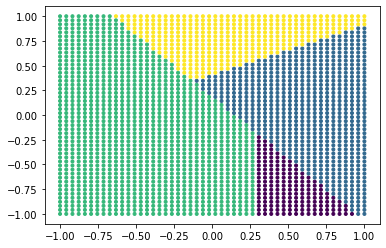

In [62]:
num_points = 50
X1 = np.linspace(-1, 1, num_points)
X2 = np.linspace(-1, 1, num_points)
X1, X2 = np.meshgrid(X1, X2)

x1 = X1.reshape(-1)
x2 = X2.reshape(-1)
y = np.zeros_like(x1, dtype=int)

y[x1<0.3] = 2
mask = (x1+0.8*x2 -0.15)>0
y[mask] = 1

mask2 = (x1-2*x2+0.8)<0
y[np.bitwise_and(mask2, mask)] = 3


%matplotlib inline
plt.scatter(x1, x2, c=y, marker='.')

In [74]:
xx = np.c_[x1, x2]
yy = tnn.Logits().index_to_logit(y)#.reshape(-1,1)

In [85]:
optim = tnn.SGD(0.1)
net = tnn.LinearLayer(2, 4, optimizer=optim)

In [86]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(111)

for epoch in range(100000):
    yout = net.forward(xx)
    dy = tnn.SoftmaxCrossEntropy().del_loss(yout, yy)
    dx = net.backward(dy)
    net.update()
    
    if epoch%100 == 0:
        
        error = tnn.SoftmaxCrossEntropy().loss(yout, yy)
        print(epoch, 'Error = ', error)
        
        out = np.argmax(yout, axis=1)
        ax.clear()
        ax.scatter(x1, x2, c=y, marker='o')
        ax.scatter(x1, x2, c=out, marker='.')

        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  9.502472938698311


100 Error =  8.876160304606627


200 Error =  8.80774080377652


300 Error =  8.790756026983962


400 Error =  8.783965219123164


500 Error =  8.779967253868525


600 Error =  8.777218261782913


700 Error =  8.775183518135716


800 Error =  8.773607513217


900 Error =  8.772341668263588


1000 Error =  8.77130434981127


1100 Error =  8.770425223474163


1200 Error =  8.769675127195994


1300 Error =  8.769021914634019


1400 Error =  8.768447750171582


1500 Error =  8.767939109048664


1600 Error =  8.767481117304333


1700 Error =  8.767070753794538


1800 Error =  8.766700384808919


1900 Error =  8.766361325367445


2000 Error =  8.766048448011317


2100 Error =  8.76575931745563


2200 Error =  8.76549569605786


2300 Error =  8.765255501058958


2400 Error =  8.765033249150745


2500 Error =  8.764826722170113


2600 Error =  8.764632026726362


2700 Error =  8.76444741081143


2800 Error =  8.76427421048377


2900 Error =  8.764112184284352


3

TclError: invalid command name "pyimage88"

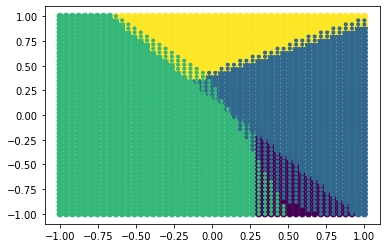

In [87]:
%matplotlib inline
plt.scatter(x1, x2, c=y, marker='o')
plt.scatter(x1, x2, c=out, marker='.')